In [14]:
# from google.colab import files
# files.upload()
# This cell is commented out because the file 'queue_waiting_time_formula_guided_1000.csv' already exists in Google Drive
# and is successfully loaded by a subsequent cell using pd.read_csv.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [15]:
df = pd.read_csv("/content/drive/MyDrive/queue_waiting_time_formula_guided_1000.csv")
df.head()




,people_ahead,avg_service_time,staff_count,staff_experience,priority_ratio,arrival_rate,service_complexity,system_status,peak_hour,waiting_time
0,40,6,4,2,0.27,11,1,1,1,120.62
1,17,3,5,1,0.12,12,4,1,0,48.34
2,17,4,5,3,0.05,8,1,0,0,25.28
3,36,2,6,2,0.31,12,3,0,0,51.50
4,1,7,3,3,0.08,0,1,1,0,3.85


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   people_ahead        1000 non-null   int64  
 1   avg_service_time    1000 non-null   int64  
 2   staff_count         1000 non-null   int64  
 3   staff_experience    1000 non-null   int64  
 4   priority_ratio      1000 non-null   float64
 5   arrival_rate        1000 non-null   int64  
 6   service_complexity  1000 non-null   int64  
 7   system_status       1000 non-null   int64  
 8   peak_hour           1000 non-null   int64  
 9   waiting_time        1000 non-null   float64
dtypes: float64(2), int64(8)
memory usage: 78.3 KB


,0
people_ahead,0
avg_service_time,0
staff_count,0
staff_experience,0
priority_ratio,0
arrival_rate,0
service_complexity,0
system_status,0
peak_hour,0
waiting_time,0


In [6]:
X = df.drop("waiting_time", axis=1)
y = df["waiting_time"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [9]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 16.354580499999983
RMSE: 28.924372575352898
R2 Score: 0.9221387505326363


In [10]:
importance = model.feature_importances_

feature_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

feature_df


,Feature,Importance
0,people_ahead,0.330289
2,staff_count,0.308838
1,avg_service_time,0.258347
7,system_status,0.026668
4,priority_ratio,0.021309
5,arrival_rate,0.020348
3,staff_experience,0.017000
8,peak_hour,0.011142
6,service_complexity,0.006060


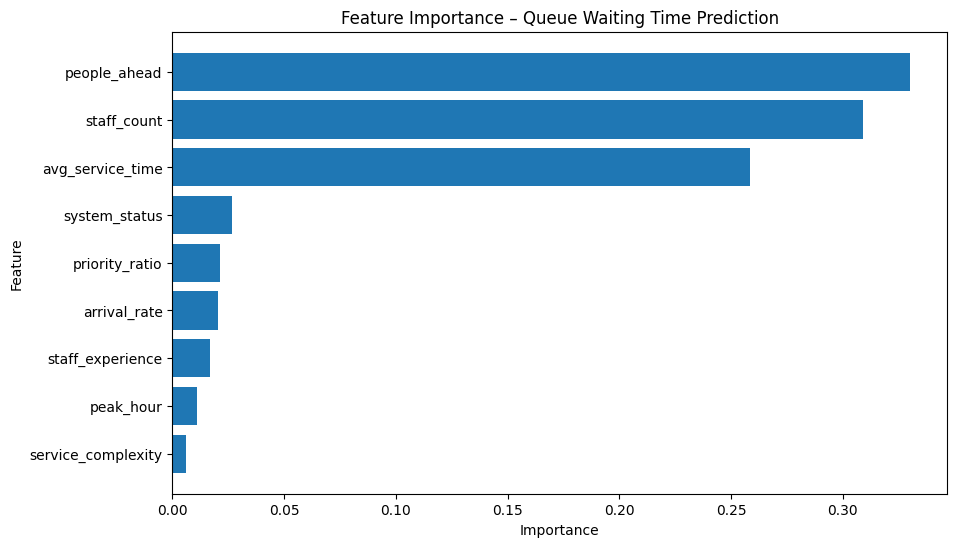

In [11]:
plt.figure(figsize=(10,6))
plt.barh(feature_df["Feature"], feature_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance – Queue Waiting Time Prediction")
plt.gca().invert_yaxis()
plt.show()


In [12]:
sample_input = pd.DataFrame([{
    "people_ahead": 18,
    "avg_service_time": 5,
    "staff_count": 2,
    "staff_experience": 2,
    "priority_ratio": 0.25,
    "arrival_rate": 7,
    "service_complexity": 3,
    "system_status": 1,
    "peak_hour": 1
}])

prediction = model.predict(sample_input)
print("Estimated Waiting Time:", round(prediction[0], 2), "minutes")


Estimated Waiting Time: 76.55 minutes
